In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# 加载原始glove单词向量库
glove_file=datapath('/home/jovyan/workspace/glove.6B.100d.txt')

In [3]:
# 转化为gensim可识别的单词向量库格式，并把转化后的文件保存到另一个txt文件中
word2vec_glove_file=get_tmpfile("/home/jovyan/workspace/glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file,word2vec_glove_file)
# 加载转化后的模型
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/tmp/ipykernel_2099/2984961082.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file,word2vec_glove_file)


In [4]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.705482542514801),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [5]:
model.most_similar(negative='banana')

[('shunichi', 0.49618101119995117),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096899986267),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957130908966),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [6]:
#这段代码的意思为：如果man对应于king，那么woman对应什么？
model.most_similar(positive=['woman','king'], negative=['man'])[0]

('queen', 0.7698541283607483)

这里附上一张著名的图，用于解释单词向量如何实现类比（analogy）
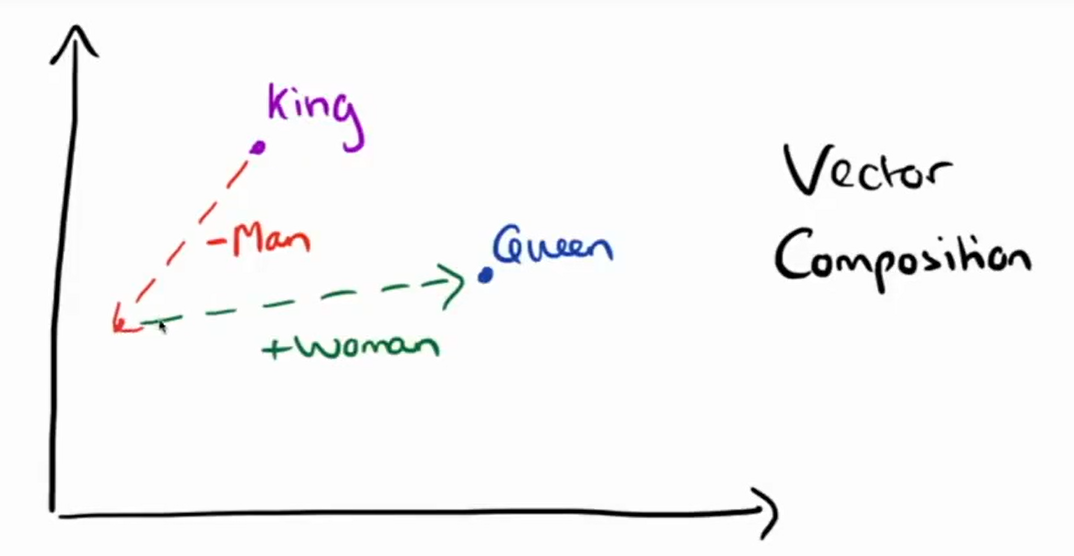

In [7]:
model.most_similar(positive=['girl','queen'], negative=['woman'])[0]

('princess', 0.7330295443534851)

## 词义有点虚，来试试硬核点的词形转换

In [8]:
#实现一个从国家到那个国家的人的单词转换方法：
def anology1(x):
    return model.most_similar(positive=[x,'chinese'], negative=['china'])[0]

In [9]:
anology1('ukraine')

('ukrainian', 0.8714503645896912)

In [10]:
#实现一个从单词的单数形式，给出其复数形式的方法：
def plural(x):
    return model.most_similar(positive=[x,'men'], negative=['man'])[0]

In [11]:
plural('goose')

('quail', 0.5249800682067871)

这个结果错了，quail是鹌鹑的意思。如果你用300d的模型，这个结果是对的。

In [12]:
plural('glove')

('gloves', 0.6566756367683411)

In [13]:
plural('panda')

('pandas', 0.6974480748176575)

In [14]:
plural('foot')

('1,500', 0.6131719946861267)

1500跟foot是什么关系？

In [15]:
plural('factory')

('factories', 0.6982031464576721)

In [16]:
plural('country')

('countries', 0.7057545185089111)